In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('House_price_cleaned_imputed.csv')

In [14]:
df.shape

(4214, 20)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4214 entries, 0 to 4213
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Superficie          4214 non-null   object
 1   Rooms               4214 non-null   object
 2   Bedrooms            4214 non-null   object
 3   Price               4214 non-null   object
 4   Location            4214 non-null   object
 5   description         4208 non-null   object
 6   Loc_Paris           4214 non-null   int64 
 7   m2                  4214 non-null   int64 
 8   building_floor      4214 non-null   int64 
 9   apartment_floor     4214 non-null   int64 
 10  nb_bath             4214 non-null   int64 
 11  Cellar              4214 non-null   int64 
 12  balc_patio          4214 non-null   object
 13  Heating             4214 non-null   object
 14  Renovated           4214 non-null   int64 
 15  Parking             4214 non-null   int64 
 16  Heating_Central     4214

In [16]:
df.describe()

,Loc_Paris,m2,building_floor,apartment_floor,nb_bath,Cellar,Renovated,Parking,Heating_Central,Heating_Individual,Price_int,Last_floor
count,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4214.000000,4.214000e+03,4214.00000
mean,13.066208,74.901281,6.203607,3.186284,0.618415,0.517323,0.073090,0.107499,0.194352,0.214048,1.003780e+06,0.13384
std,5.143110,57.904303,3.031495,2.771064,0.730537,0.499759,0.260315,0.309783,0.395748,0.410209,1.062671e+06,0.34052
min,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000e+04,0.00000
25%,9.000000,36.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.285000e+05,0.00000
50%,15.000000,60.000000,6.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.988000e+05,0.00000
75%,17.000000,94.000000,6.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.220000e+06,0.00000
max,20.000000,855.000000,33.000000,32.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.970000e+07,1.00000


Outliers detected. We will explore them later after separating the dataframe into numerical and catgeorical features and then plotting the distribution of the numerical features.

In [17]:
df.columns

Index(['Superficie', 'Rooms', 'Bedrooms', 'Price', 'Location', 'description',
       'Loc_Paris', 'm2', 'building_floor', 'apartment_floor', 'nb_bath',
       'Cellar', 'balc_patio', 'Heating', 'Renovated', 'Parking',
       'Heating_Central', 'Heating_Individual', 'Price_int', 'Last_floor'],
      dtype='object')

In [18]:
#numerical variables
num=['m2','Price_int']

#categorical variables
cat=['Rooms', 'Bedrooms','building_floor', 'apartment_floor', 'nb_bath','balc_patio','Loc_Paris','Cellar','Renovated', 'Parking', 'Heating_Central',
       'Heating_Individual','Last_floor']

# Exploratory Data Analysis

## Exploring numerical features and detecting and removing outiliers

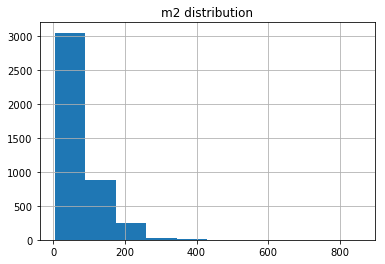

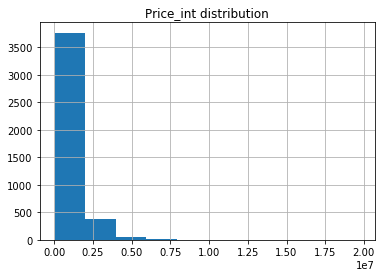

In [19]:
for i in num:
    df[i].hist()
    plt.title(f'{i} distribution')
    plt.show()

m2, Price_int are not normally distributed. We will need to normalize to use some regression techniques. May be we can use the log transformation.




## Outliers Detection and Removal

First of all we will have a look at the column m2 which represents the number of square feet of the apartment.

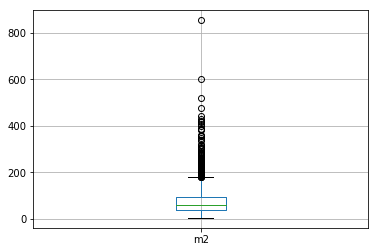

In [20]:
df.boxplot(column='m2')

### It seems that there are a lot of outliers. It is good practice to remove them since some models are sensitive to outliers (example of the Linear regression that we will use). We will use the Interquartile Range to remove the outliers.


In [28]:
# to create the upper and the lower range I will define a function. I will use this function for the Price and the m2 feature.
def upper_lower(feature):
    Q1,Q3 = np.percentile(df[feature] , [25,75])
    IQR=Q3-Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    return lower, upper

lower_m2,upper_m2= upper_lower('m2')
lower_Price_int,upper_Price_int=upper_lower('Price_int')

df1=df[(df.m2>lower_m2)&(df.m2<upper_m2)]
df2=df1[(df1.Price_int>lower_Price_int)&(df1.Price_int<upper_Price_int)]

In [58]:
df[df.m2>175]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage,nb_bathrooms
10,189m²,6 p.,4 p.,2 490 000,Paris 08 (75008)\r\nParis 8ème,Ref de l'annonce\r\n:LKM29571\r\nChauffage\r\n...,8,189,4,2,1,1,Balcon,Au gaz,0,1,0,0,2490000,0,1
63,202m²,7 p.,4 p.,3 300 000,Paris 06 (75006)\r\nLuxembourg,Ref de l'annonce\r\n:8275\r\nChauffage\r\n:Ind...,6,202,6,2,1,1,Balcon,Individuel,0,0,0,1,3300000,0,1
73,182m²,6 p.,4 p.,2 450 000,Paris 17 (75017)\r\nParis 17ème,Ref de l'annonce\r\n:255\r\nEtage du bien\r\n:...,17,182,6,6,2,1,0,Unknown,0,0,0,0,2450000,1,2
74,187m²,6 p.,3 p.,2 475 000,Paris 08 (75008)\r\nParis 8ème,Ref de l'annonce\r\n:161607549\r\nChauffage\r\...,8,187,6,4,0,0,Balcon,électrique,0,0,0,0,2475000,0,0
85,201m²,6 p.,3 p.,3 150 000,Paris 16 (75116)\r\nParis,Ref de l'annonce\r\n:W-02HFSG\r\nEtage du bien...,16,201,6,1,3,1,0,Unknown,0,0,0,0,3150000,0,3
88,193m²,6 p.,3 p.,2 530 000,Paris 08 (75008)\r\nParis 8ème,Ref de l'annonce\r\n:W-02IXSW\r\nChauffage\r\n...,8,193,6,4,0,0,Balcon,Individuel,0,1,0,1,2530000,0,0
91,288m²,7 p.,4 p.,3 150 000,Paris 17 (75017)\r\nParis 17ème,Ref de l'annonce\r\n:W-02I4MN\r\nTerrasse/Balc...,17,288,6,2,2,1,Balcon,Unknown,0,0,0,0,3150000,0,2
93,218m²,6 p.,4 p.,2 650 000,Paris 16 (75116)\r\nParis,Ref de l'annonce\r\n:W-02IBC5\r\nChauffage\r\n...,16,218,7,2,2,0,Balcon,Central,0,0,1,0,2650000,0,2
98,233m²,3 p.,2 p.,835 000,Paris 16 (75116)\r\nParis,Ref de l'annonce\r\n:W-02H4J7\r\nEtage du bien...,16,233,4,1,2,1,0,Unknown,0,0,0,0,835000,0,2
104,229m²,4 p.,2 p.,1 455 000,Paris 16 (75116)\r\nParis,Ref de l'annonce\r\n:W-02G9MK\r\nTerrasse/Balc...,16,229,6,2,2,0,Balcon,Unknown,0,0,0,0,1455000,0,2


These apartments are real, but it is very rare to find apartments of more than 175 m² in Paris. We should consider them as outliers and remove them.


In [59]:
df=df[~(df.m2>175)]

It seems that there are some apartments that are less than 10 meters. Let us check them.

In [60]:
pd.set_option('display.max_rows', None)
df[df.m2<10]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage,nb_bathrooms
156,9m²,1 p.,0 p.,117 500,Paris 17 (75017)\r\nParis 17ème,Ref de l'annonce\r\n:CF345\r\nEtage du bien\r\...,17,9,6,6,0,0,0,Unknown,0,0,0,0,117500,1,0
228,8m²,1 p.,0 p.,86 000,Paris 17 (75017)\r\nParis 17ème,Ref de l'annonce\r\n:LKM21210\r\nEtage du bien...,17,8,7,7,0,0,0,Unknown,0,0,0,0,86000,1,0
291,9m²,1 p.,0 p.,110 000,Paris 11 (75011)\r\nParis 11ème,Ref de l'annonce\r\n:833\r\nEtage du bien\r\n:...,11,9,8,7,0,0,0,Unknown,0,0,0,0,110000,0,0
358,7m²,1 p.,0 p.,105 000,Paris 16 (75016)\r\nParis,Ref de l'annonce\r\n:162406879\r\nChauffage\r\...,16,7,7,2,0,0,0,Au gaz,0,0,0,0,105000,0,0
383,8m²,1 p.,0 p.,118 000,Paris 15 (75015)\r\nPARIS 15,Ref de l'annonce\r\n:216805\r\nChauffage\r\n:I...,15,8,8,8,0,0,0,"Individuel, électrique",0,0,0,1,118000,1,0
392,8m²,1 p.,0 p.,109 000,Paris 16 (75016)\r\nParis,Ref de l'annonce\r\n:32091538\r\nChauffage\r\n...,16,8,8,8,0,0,0,Central,0,0,1,0,109000,1,0
524,9m²,2 p.,1 p.,770 000,Paris 02 (75002)\r\nParis 2ème,Ref de l'annonce\r\n:PLHEV2\r\nChauffage\r\n:I...,2,9,6,1,0,0,0,Individuel,0,0,0,1,770000,0,0
572,9m²,1 p.,0 p.,110 000,Paris 18 (75018)\r\nParis 18ème,Ref de l'annonce\r\n:W-02JJQT\r\nEtage du bien...,18,9,4,4,1,0,0,Unknown,0,0,0,0,110000,1,1
589,9m²,1 p.,0 p.,110 000,Paris 11 (75011)\r\nParis 11ème,Ref de l'annonce\r\n:833\r\nEtage du bien\r\n:...,11,9,8,7,0,0,0,Unknown,0,0,0,0,110000,0,0
639,7m²,1 p.,0 p.,90 000,Paris 02 (75002)\r\nParis 2ème,Ref de l'annonce\r\n:2803\r\nChauffage\r\n:Ind...,2,7,6,6,0,0,0,Individuel,0,0,0,1,90000,1,0


These kind of small apartments are usually called "Chambre de Bonne" and are usually at the last etage of an immeuble. But these kinds of apartments are rare in Paris and therefore I think the best solution is to consider them as outliers.

In [61]:
df=df[~(df.m2<10)]

Now let's check the target variable Price_int ie the Price of the apartment in euros.

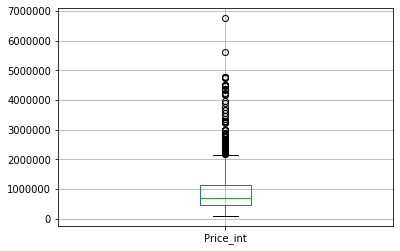

In [62]:
df.boxplot(column='Price_int')

It seems that there are a lot of outliers too. Let us explore these outliers. 

In [63]:
print(df[df.Price_int>2100000].Loc_Paris.value_counts())
mean=df[df.Price_int>2100000].m2.mean()
print(f'Mean price is {mean}')

16    29
7     22
6     22
8     17
14    11
17     9
13     7
5      5
3      3
4      2
18     1
15     1
9      1
2      1
Name: Loc_Paris, dtype: int64
Mean price is 137.06870229007635


These apartments are mostly situated in the arrondissement expensive of Paris. And represents apartment of in average 140 m² which is very large for apartments in Paris. After looking on the net I found that the surface median of apartment in Paris is nearly 50m². I think the best idea is to drop these kind of unuasual apartments (treat them as outliers)

In [64]:
df= df[~(df.Price_int>2100000)]

I also want to explore the apartment that cost less than 100 000 euros, because i foind that very weird.

In [65]:
df[df.Price_int<100000]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage,nb_bathrooms
2143,10m²,1 p.,0 p.,91 000,Paris 10 (75010)\r\nParis 10ème,Ref de l'annonce\r\n:5370\r\nEtage du bien\r\n...,10,10,6,6,0,0,0,Unknown,0,0,0,0,91000,1,0
2225,10m²,1 p.,0 p.,87 000,Paris 15 (75015)\r\nPARIS,Ref de l'annonce\r\n:216239\r\nChauffage\r\n:I...,15,10,6,6,0,0,0,"Individuel, électrique",0,0,0,1,87000,1,0
2325,11m²,1 p.,0 p.,89 000,Paris 12 (75012)\r\nDaumesnil,Ref de l'annonce\r\n:30851149\r\nEtage du bien...,12,11,7,7,0,0,0,Unknown,0,0,0,0,89000,1,0
2453,58m²,1 p.,0 p.,86 900,Paris 04 (75004)\r\nParis 4ème,Ref de l'annonce\r\n:227\r\nChauffage\r\n:Indi...,4,58,5,5,0,0,0,Individuel,0,0,0,1,86900,1,0
2506,11m²,1 p.,0 p.,98 000,Paris 12 (75012)\r\nPARIS,Ref de l'annonce\r\n:216038\r\nEtage du bien\r...,12,11,7,7,0,0,0,Unknown,0,0,0,0,98000,1,0


In [66]:
# it seems that a 58m2 apartment is sold at 58000. That's very cheap, too cheap and very unusual. Let's drop it.
df.drop(2453,inplace=True)

### Exploring the colinearity between the different features

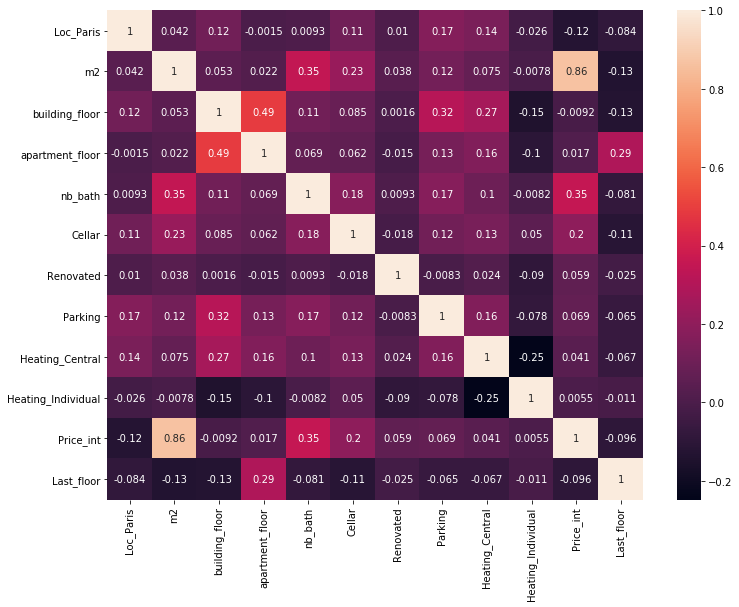

In [29]:
plt.figure(figsize=(12,9))
sns.heatmap(df2.corr(), annot=True)

- Price and m2 are highly correlated. It is normal since we know that the price of an apartment is mostly due to its square feet. We always talk about in the price per square feet when we talk about surfaces.
- What strikes me the most is that the hight of the building and the etage at which the apartment is situated is nearly not correlated at all with the Price. I expected very hight building to be less expensive than the others. 
- The number of salle de bain is also correlated with the price. This is normal since the number of salle de bain is representative of the quality of an apartmeent in general.
- Presence or absence of a cave is also positively correlated with the Price. does not strkies me, a cave as a price when u buy an partment.
- It seems that the type of Chauffage does not have an impact on the Price.  Je m'attendais à cela. This is not something that real estate ask when they want to predict the price of your house.
- Also, what is weird is thaht the fact that the apartment is Rénové or not is not very correlated witht he Price of the House.
- Same thing for presence or absence of a Parking.

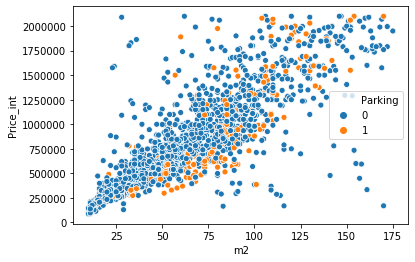

In [68]:
sns.scatterplot(x='m2',y='Price_int',data=df, hue='Parking')

## Exploratory Data analysis of the categorical features

Looking at the correlation matrix, it is difficult to asses whether or not the renovation of a house increases or not its price. I will first have a look at this categorical feature. 

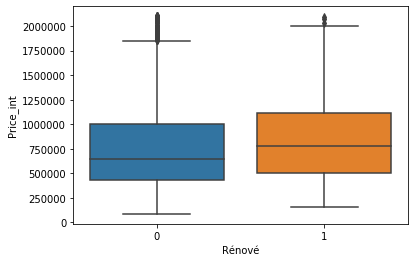

In [69]:
sns.boxplot(x='Rénové',y='Price_int',data=df)


As expected, it seems that the fact that an apartment is renové as an importance since the Price is higher in average.

### Number of occurences for each categorical features

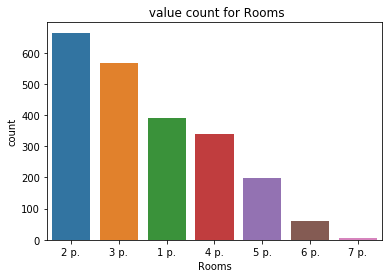

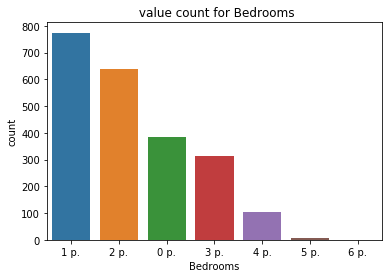

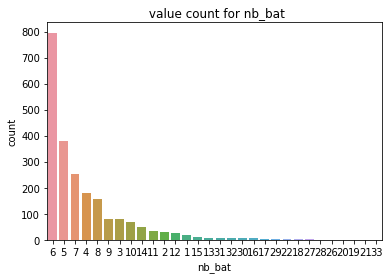

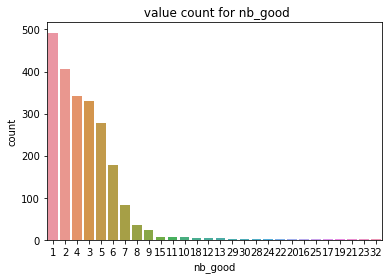

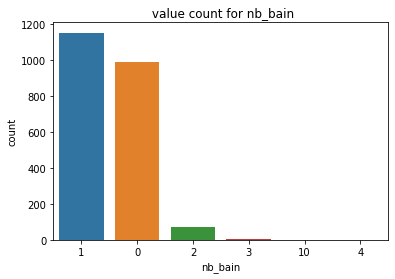

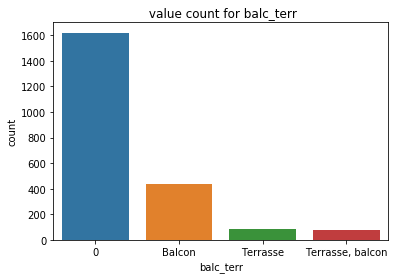

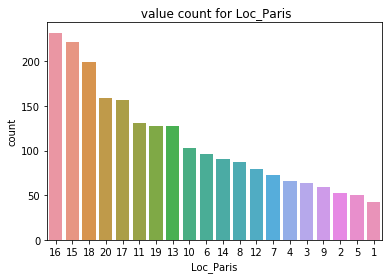

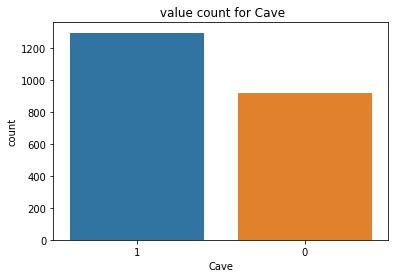

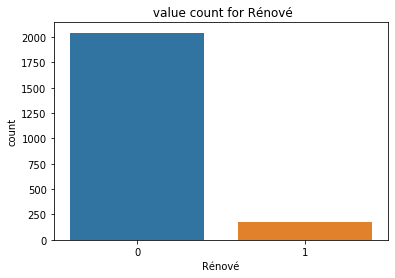

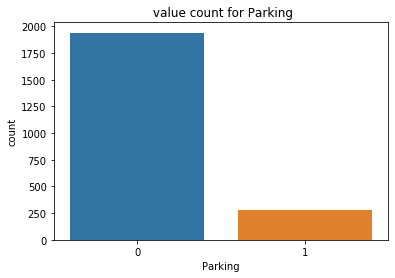

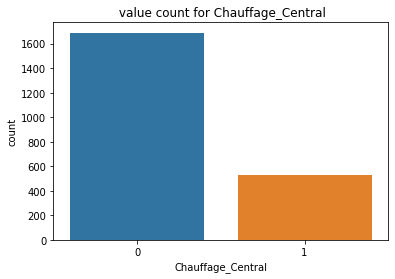

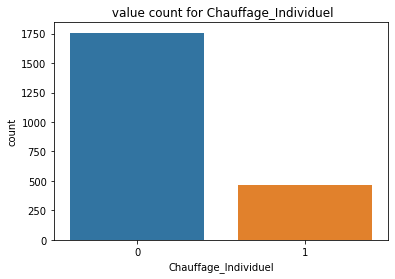

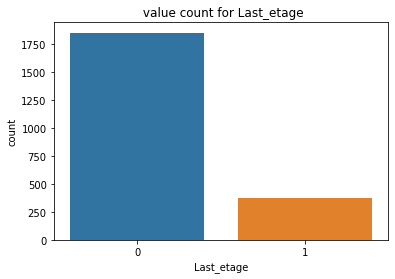

In [70]:
for i in cat:
    plt.title(f' value count for {i}')
    sns.countplot(x=i,data=df,order=df[i].value_counts().index)
    plt.show()

- for the number of rooms: The higher the number of rooms the less number of apartments at sale. Seems normal since the average surface for an apartmen,t in Paris is 46 m².
- for the number of bedrooms: Same as the number of rooms.
- for the number of etage of an apartment: mostly the number of etage for the building in Paris is between 9 and 3.
- for the number of bathrooms: alot of announces that do not specify the number of bathrooms. May be we should have a look at it.
- for the number of apartment sold ine each locations: Arrondissement with the more apartment availables are 16,15,18,20,17. And the apartment with less apartments available are: the 1, 2,5,9,3,4
- for the number of apartments which were renovated: a very small fraction of the apartments were renovated recently.


#### Investigating the feature number of rooms, bedrooms and bathrooms
Normally the more rooms the higher the price. Let's check if it is the case

In [71]:
pd.pivot_table(df,index='Rooms',values='Price_int',).sort_values('Price_int')

,Price_int
Rooms,
1 p.,3.249513e+05
2 p.,5.417750e+05
3 p.,8.596821e+05
4 p.,1.108566e+06
5 p.,1.445101e+06
6 p.,1.661234e+06
7 p.,1.711143e+06


In [72]:
pd.pivot_table(df,index='Bedrooms',values='Price_int',).sort_values('Price_int')

,Price_int
Bedrooms,
0 p.,3.420751e+05
1 p.,5.845721e+05
2 p.,9.314711e+05
3 p.,1.252008e+06
6 p.,1.350000e+06
4 p.,1.534916e+06
5 p.,1.635143e+06


Perfect, it seems that our assumption is true. Yes, this is a really basic assumption but it proves the normality of the database or at least it proves that there is no problems in it.
But what strikes me is that the average price for 6 bedrooms apartments is lower than the average price for 4 or 5 bedfooms apartments. 
After checking the number of occurences of 6 p apartments (only one occurences), this case might be an outlier. I will explore it.

In [73]:
df[df.Bedrooms=='6 p.']

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage,nb_bathrooms
795,129m²,7 p.,6 p.,1 350 000,Paris 12 (75012)\r\nPARIS,Ref de l'annonce\r\n:2280\r\nChauffage\r\n:Ind...,12,129,5,4,1,0,0,"Individuel, électrique",0,0,0,1,1350000,0,1


7 piece for 6 bedrooms. What an unusual apartment. I will consider it as an outlier and drop it.


In [74]:
df.drop(795,inplace=True)

In [75]:
pd.pivot_table(df,index='nb_bain',values='Price_int',).sort_values('Price_int')

,Price_int
nb_bain,
0,6.115975e+05
1,8.799169e+05
10,8.990000e+05
2,1.564610e+06
4,1.600000e+06
3,1.656250e+06


Again, some apartments with more bathrooms cost less. That's weird. We need to explore it. After looking at the number of occurences it seems that there are very few apartments with mroe than 4 bathrooms. Seems normal. let us explore them.

In [76]:
df[df.nb_bain>=3]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage,nb_bathrooms
54,82m²,6 p.,3 p.,880 000,Paris 09 (75009)\r\nParis 9ème,Ref de l'annonce\r\n:6ff4a0\r\nChauffage\r\n:I...,9,82,5,2,3,1,Balcon,Individuel,0,0,0,1,880000,0,3
431,161m²,6 p.,4 p.,1 600 000,Paris 15 (75015)\r\nParis 15ème,Ref de l'annonce\r\n:VA1904-PARISIAN\r\nTerras...,15,161,32,32,4,1,Terrasse,Unknown,0,0,0,0,1600000,1,4
1757,142m²,6 p.,3 p.,1 995 000,Paris 16 (75116)\r\nParis,Ref de l'annonce\r\n:V40000396\r\nChauffage\r\...,16,142,9,6,3,1,"Terrasse, balcon",Central,0,0,1,0,1995000,0,3
1882,170m²,5 p.,3 p.,2 100 000,Paris 16 (75016)\r\nParis,Ref de l'annonce\r\n:FOCH - CONTEMPORAIN\r\nPa...,16,170,5,2,3,1,0,Unknown,0,1,0,0,2100000,0,3
1915,80m²,4 p.,2 p.,899 000,Paris 10 (75010)|Château d'Eau - Lancry,Ref de l'annonce\r\n:1703\r\nChauffage\r\n:Ind...,10,80,6,4,10,1,0,"Individuel, au gaz",0,0,0,1,899000,0,10
2199,80m²,4 p.,2 p.,899 000,Paris 10 (75010)\r\nRépublique - Canal,Ref de l'annonce\r\n:1703\r\nChauffage\r\n:Ind...,10,80,6,4,10,1,0,Individuel,0,0,0,1,899000,0,10
2321,115m²,4 p.,3 p.,1 650 000,Paris 02 (75002)\r\nRéaumur,Ref de l'annonce\r\n:1796\r\nEtage du bien\r\n...,2,115,5,1,3,0,0,Unknown,0,0,0,0,1650000,0,3


Three outliers detected. 6p for 82 meters that is not possible. It might be an error. And 80 m2 for 10 bathrooms is not possible too, it might be an error. Let us drop them.


In [77]:
df.drop([54,1915,2199],inplace=True)

#### Exploring the feature nb_bain to determine why the number of bathrooms was not specified in a lot of cases.

In [78]:
df[df.nb_bain==0]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage,nb_bathrooms
2,32m²,1 p.,0 p.,375 000,Paris 15 (75015)\r\nParis 15ème,Ref de l'annonce\r\n:162373805\r\nChauffage\r\...,15,32,9,8,0,1,0,Au gaz,0,0,0,0,375000,0,0
4,29m²,1 p.,0 p.,346 500,Paris 20 (75020)\r\nAlexandre Dumas,Ref de l'annonce\r\n:0147\r\nParking\r\nEtage ...,20,29,5,4,0,0,0,Unknown,0,1,0,0,346500,0,0
6,28m²,1 p.,0 p.,355 000,Paris 15 (75015)\r\nParis 15ème,Ref de l'annonce\r\n:75177\r\nRénové\r\nChauff...,15,28,6,1,0,0,0,électrique,1,0,0,0,355000,0,0
12,25m²,2 p.,1 p.,385 000,Paris 02 (75002)\r\nParis 2ème,Ref de l'annonce\r\n:524\r\nEtage du bien\r\n:...,2,25,6,3,0,0,0,Unknown,0,0,0,0,385000,0,0
14,23m²,1 p.,0 p.,313 500,Paris 01 (75001)\r\nParis 1er,Ref de l'annonce\r\n:1315\r\nChauffage\r\n:Ind...,1,23,5,4,0,0,0,Individuel,0,0,0,1,313500,0,0
18,40m²,2 p.,1 p.,400 000,Paris 18 (75018)\r\nParis 18ème,Ref de l'annonce\r\n:404\r\nChauffage\r\n:Indi...,18,40,6,1,0,1,0,"Individuel, au gaz",0,0,0,1,400000,0,0
20,51m²,3 p.,2 p.,575 000,Paris 12 (75012)\r\nParis 12ème,Ref de l'annonce\r\n:LKM31905\r\nEtage du bien...,12,51,6,1,0,1,0,Unknown,0,0,0,0,575000,0,0
24,60m²,3 p.,2 p.,830 000,Paris 11 (75011)\r\nParis 11ème,Ref de l'annonce\r\n:VB/90voltaire.a\r\nRénové...,11,60,6,3,0,1,0,électrique,1,0,0,0,830000,0,0
26,39m²,2 p.,1 p.,446 000,Paris 11 (75011)\r\nParis 11ème,Ref de l'annonce\r\n:5470\r\nEtage du bien\r\n...,11,39,6,1,0,1,0,Unknown,0,0,0,0,446000,0,0
30,42m²,2 p.,1 p.,610 000,Paris 03 (75003)\r\nParis 3ème,Ref de l'annonce\r\n:CT2098\r\nRénové\r\nChauf...,3,42,6,5,0,1,0,électrique,1,0,0,0,610000,0,0


After looking at logic_immo website, these apartments have a bathrooms, it was just not specified in their caracteristics. Therefor let's put a 1 instead of a 0.


In [79]:
df.nb_bain=df.nb_bain.apply(lambda x: 1 if x==0 else x)

In [80]:
df.nb_bain.value_counts()

1    2139
2      73
3       3
4       1
Name: nb_bain, dtype: int64

I am wondering why the Last etage feature is not correlated with the Price of the apartment. I thought that apartments at the last etage would be way more expensive due to the view and others factors. Let us explore it.

In [81]:
pd.pivot_table(df,index=['Last_etage','Rooms'],values='Price_int',).sort_values('Price_int')

Price_int
Last_etage Rooms              
1          1 p.   2.719803e+05
0          1 p.   3.453103e+05
1          2 p.   5.246397e+05
0          2 p.   5.455934e+05
           3 p.   8.445297e+05
1          3 p.   9.653221e+05
0          4 p.   1.105113e+06
1          4 p.   1.157753e+06
           5 p.   1.382692e+06
0          5 p.   1.454590e+06
1          7 p.   1.570000e+06
0          6 p.   1.674284e+06
1          6 p.   1.676154e+06
0          7 p.   1.811600e+06

On average this is not the case. I grouped by Rooms in the pivot table to avoid that "Chambre de bonne" affect to much the price of last etage apartments, since there are usually under the toit and thus at the last etage.
I do not understand why it seems that on average apartments on the last etage are less expensive. I will have a look at it on the Internet and try to understand this.

### Checking if there is not abnormal number of rooms etc

In [82]:
df=df[~(df.Rooms<df.Bedrooms)]

In [83]:
pd.set_option('display.max_columns', None)
df[(df.Bedrooms<df.nb_bathrooms) & (df.Bedrooms!="0 p.")]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage,nb_bathrooms
1023,77m²,3 p.,1 p.,1 100 000,Paris 01 (75001)\r\nHalles,Ref de l'annonce\r\n:4027643\r\nChauffage\r\n:...,1,77,6,2,2,0,0,"Individuel, au gaz",0,0,0,1,1100000,0,2
1217,43m²,2 p.,1 p.,1 170 000,Paris 02 (75002)\r\nParis 2ème,Ref de l'annonce\r\n:W-02HY5V\r\nEtage du bien...,2,43,6,2,2,0,0,Unknown,0,0,0,0,1170000,0,2
1236,51m²,2 p.,1 p.,1 470 000,Paris 04 (75004)\r\nParis 4ème,Ref de l'annonce\r\n:W-02IFKQ\r\nTerrasse/Balc...,4,51,6,5,2,0,Terrasse,Unknown,0,0,0,0,1470000,0,2


In [84]:
df=df[~((df.Bedrooms<df.nb_bathrooms) & (df.Bedrooms!="0 p."))]

### Relationship between the price and the different categorical features

In [85]:
for i in cat:
    print(i)
    print(pd.pivot_table(df,index=i,values='Price_int',).sort_values('Price_int'))
    print('\n')

Rooms
          Price_int
Rooms              
1 p.   3.230210e+05
2 p.   5.373534e+05
3 p.   8.592567e+05
4 p.   1.109813e+06
5 p.   1.445101e+06
6 p.   1.674703e+06
7 p.   1.771333e+06


Bedrooms
             Price_int
Bedrooms              
0 p.      3.420751e+05
1 p.      5.819958e+05
2 p.      9.338910e+05
3 p.      1.252826e+06
4 p.      1.534916e+06
5 p.      1.635143e+06


nb_bat
           Price_int
nb_bat              
14      3.590812e+05
29      4.742500e+05
22      4.900000e+05
28      5.150000e+05
31      5.403750e+05
27      5.522500e+05
17      5.820000e+05
2       6.305383e+05
20      6.460000e+05
32      6.659286e+05
18      6.949070e+05
4       6.980636e+05
30      7.005036e+05
15      7.226000e+05
33      7.300000e+05
3       7.308781e+05
16      7.355833e+05
5       7.383488e+05
21      7.490000e+05
1       7.829722e+05
7       8.028268e+05
6       8.243915e+05
13      8.333322e+05
10      8.381290e+05
26      8.400000e+05
11      8.491486e+05
8       8.533210e+05
1

## Normalization and Scaling

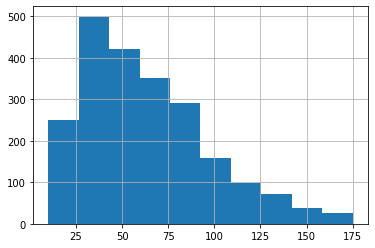

In [86]:
df.m2.hist()

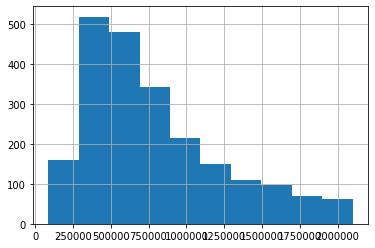

In [87]:
df.Price_int.hist()

In [88]:
df.Price_int.skew()


0.989340359932327

In [32]:
#We will use the log transformation on the Price_int column.
df.Price_int=np.log(df.Price_int)
df.Price_int.skew()

0.06570379583869052

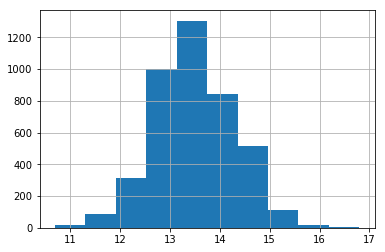

In [33]:
df.Price_int.hist()

In [35]:
df.m2=np.log(df.m2)

In [36]:
df.to_csv('final_data_imputed.csv',index=False)